In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
df = pd.read_csv("C:\\Users\\thall\\Downloads\\car_price_dataset.csv")
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [48]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [9]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [31]:
df.shape

(10000, 10)

In [42]:
## check null values
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [44]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [50]:
## check duplicates and drop

df.duplicated()
df = df.drop_duplicates()


In [51]:
# Check dimensions again
df.shape

(10000, 10)

In [59]:
#df['Brand']['Model'].value_counts()

In [56]:
df['Brand'].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [70]:
df['Price'].unique()

array([ 8501, 12092, 11171, ...,  9866,  4084,  3342], dtype=int64)

,Brand,Price
0,Audi,8929.373796
1,BMW,8704.068068
2,Chevrolet,9015.683948
3,Ford,8852.570611
4,Honda,8665.596630
5,Hyundai,8778.279397
6,Kia,8880.086066
7,Mercedes,8980.087049
8,Toyota,8798.184536
9,Volkswagen,8928.377451


In [98]:
brand_models = df.groupby('Brand')['Model'].value_counts()
print(brand_models)
print()
print()
unique_brand_model = df.groupby('Brand')['Model'].nunique()
unique_brand_model

Brand       Model   
Audi        Q5          350
            A4          350
            A3          338
BMW         5 Series    353
            3 Series    335
            X5          311
Chevrolet   Impala      355
            Malibu      333
            Equinox     315
Ford        Fiesta      363
            Focus       351
            Explorer    334
Honda       Accord      365
            Civic       336
            CR-V        308
Hyundai     Elantra     347
            Tucson      329
            Sonata      319
Kia         Optima      336
            Rio         327
            Sportage    313
Mercedes    E-Class     321
            GLA         315
            C-Class     306
Toyota      Corolla     325
            RAV4        324
            Camry       321
Volkswagen  Tiguan      352
            Golf        339
            Passat      329
Name: count, dtype: int64




Brand
Audi          3
BMW           3
Chevrolet     3
Ford          3
Honda         3
Hyundai       3
Kia           3
Mercedes      3
Toyota        3
Volkswagen    3
Name: Model, dtype: int64

In [91]:
brand_models = df.groupby('Brand')['Model'].nunique().reset_index()
brand_models.columns = ['Brand', 'Number_of_Models']

print(brand_models)

        Brand  Number_of_Models
0        Audi                 3
1         BMW                 3
2   Chevrolet                 3
3        Ford                 3
4       Honda                 3
5     Hyundai                 3
6         Kia                 3
7    Mercedes                 3
8      Toyota                 3
9  Volkswagen                 3


In [96]:
brand_avg_price = df.groupby('Brand')['Price'].mean().reset_index()
brand_avg_price

,Brand,Price
0,Audi,8929.373796
1,BMW,8704.068068
2,Chevrolet,9015.683948
3,Ford,8852.570611
4,Honda,8665.596630
5,Hyundai,8778.279397
6,Kia,8880.086066
7,Mercedes,8980.087049
8,Toyota,8798.184536
9,Volkswagen,8928.377451


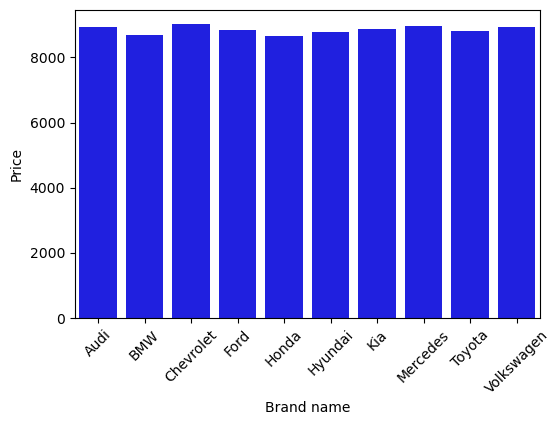

In [95]:
plt.figure(figsize = (6, 4))
sns.barplot(data = brand_avg_price, x = 'Brand', y = 'Price', color = 'b')
plt.xlabel("Brand name")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

### FEATURE ENGINEERING

In [101]:
#### adding current year to calculate number of years from the time car was bought

df['Current_Year'] = datetime.now().year

df['How_old_car'] = df['Current_Year'] - df['Year']
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Curret_Year,Current_Year,How_old_car
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,2025,2025,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,2025,2025,13
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,2025,2025,5
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,2025,2025,2
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,2025,2025,22


In [54]:
df_numerical = list(df.describe().columns)
df_categorical = list(set(df.columns).difference(df_numerical))
print(df_numerical)
print(df_categorical)

['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']
['Fuel_Type', 'Brand', 'Model', 'Transmission']


In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[df_numerical].corr(), annot = True, fmt = ".2f", cmap = 'Greens')
plt.show()